# Q2, Simone's Part

In [11]:
import networkx as nx
import pandas as pd

hero_net = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/hero-network.csv')
hero_net

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
...,...,...
574462,COLOSSUS II/PETER RA,CALLISTO
574463,CALLISTO,ROGUE /
574464,CALLISTO,CALIBAN/
574465,CALIBAN/,ROGUE /


In [12]:
# First, we need to define the top N heroes:
hero_comic = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/edges.csv')
hero_comic

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251
...,...,...
96099,ZZZAX,H2 326
96100,ZZZAX,H2 327
96101,ZZZAX,M/CP 8/4
96102,ZZZAX,PM 47


In [13]:
top_heroes = pd.DataFrame(hero_comic.groupby(['hero'])['hero'].count()).rename(columns={'hero':'Total_Appearances'}).sort_values('Total_Appearances', ascending = False)
top_heroes

,Total_Appearances
hero,
SPIDER-MAN/PETER PARKER,1577
CAPTAIN AMERICA,1334
IRON MAN/TONY STARK,1150
THING/BENJAMIN J. GR,963
THOR/DR. DONALD BLAK,956
...,...
"LEASH, MICAH",1
LEATHER/,1
SERSI | MUTANT X-VER,1


In [14]:
# We create the function top_N:
def top_N(data, N):
    return data[0:N-1]

top_N(top_heroes, 50)

,Total_Appearances
hero,
SPIDER-MAN/PETER PARKER,1577
CAPTAIN AMERICA,1334
IRON MAN/TONY STARK,1150
THING/BENJAMIN J. GR,963
THOR/DR. DONALD BLAK,956
HUMAN TORCH/JOHNNY S,886
MR. FANTASTIC/REED R,854
HULK/DR. ROBERT BRUC,835
WOLVERINE/LOGAN,819


In [1]:
# Now we have to create the graphs.

# The first graph is the one Ioannis created in class, so:
from backend import graph
g_hero_net, graph_type = graph.collaborative.create_from(data='/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/hero-network.csv')
# The second one is the graph that links heroes to comics:
g, graph_type = graph.hero_comic.create_from(nodes='/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/nodes.csv', edges='/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/edges.csv')

In [ ]:
import matplotlib.pyplot as plt

g.edges()

In [28]:
nx.bidirectional_shortest_path(g, 'ZABU', 'ABOMINATION/EMIL BLO')

['ZABU', 'A 118', "BLACK PANTHER/T'CHAL", 'H2 278', 'ABOMINATION/EMIL BLO']

In [22]:
hero1 = 'Superman'
hero2 = 'Batman'

list_heroes = ['Spongebob', 'Pikachu', 'Joker']

list_heroes.insert(0, hero1)
list_heroes.append(hero2)
list_heroes

['Superman', 'Spongebob', 'Pikachu', 'Joker', 'Batman']

## Functionality 3:

In [54]:
nx.info(g)

/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/ipykernel_12395/3034883828.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(g)


'Graph with 19087 nodes and 96104 edges'

In [ ]:
import itertools
import networkx as nx

def get_subgraph_with(graph: nx.Graph, heroes: iter):
    """Gets a subgraph of the given graph with the heroes and their neighbours.
    :arg
    graph (nx.Graph) - a networkx graph consisting of heroes that are connected to comics.
    heroes (iter) - an iterable of heroes that should be included in the subgraph.
    :return
    a networkx graph that is a subgraph of the given graph with all the provided heroes and the comics they appear in.
    """
    comics = list(itertools.chain(*set(graph.neighbors(hero) for hero in heroes)))
    subgraph = graph.subgraph(heroes + comics)
    return subgraph

subg = get_subgraph_with(g_hero_net,  list(top_N(top_heroes, 2).index))
print(len(subg.nodes()))

In [29]:
# Now we can implement Functionality 3:
def shortest_order_route(data, initial_hero, final_hero, superheroes: list, N = 25):  # 
     
     # First of all, we initialize the list which will contain the shortes path
     path = []

     # Second, we have to focus on the top N nodes in the graph.
     # To do it, we first remove the nodes (and the edges, of course) that are not in the top-N nodes
     subg = get_subgraph_with(g_hero_net,  list(top_N(top_heroes, N).index))

     # Now we want to create a list containing all the superheroes we have to visit, inlcluding the starting one and the ending one
     superheroes.insert(0, initial_hero)
     superheroes.append(final_hero)


     # Now, we compute the shortest path between the first and the second, then between the second and the third, and so on,
     # until we visit (in order) all the nodes contained in the original list given as input
     for h in range(len(superheroes) - 1):
          a = nx.bidirectional_shortest_path(data, superheroes[h], superheroes[h+1])
          if len(a) == 0:
               print("WARNING: There is no such path")
               break
          for x in a:
               path.append(a)
     return(superheroes)

     

['Mone', 'Raul, Davide', 'Daniele', 'Susi']

In [30]:
ini = 'CYCLOPS/SCOTT SUMMER'
fin = 'COLOSSUS II/PETER RA'
h = ['WASP/JANET VAN DYNE', 'JAMESON, J. JONAH', 'SUB-MARINER/NAMOR MA', 'PROFESSOR X/CHARLES', 'FURY, COL. NICHOLAS', 'MARVEL GIRL/JEAN GRE']

shortest_order_route(g_hero_net, ini, fin, h)

['CYCLOPS/SCOTT SUMMER',
 'WASP/JANET VAN DYNE',
 'JAMESON, J. JONAH',
 'SUB-MARINER/NAMOR MA',
 'PROFESSOR X/CHARLES',
 'FURY, COL. NICHOLAS',
 'MARVEL GIRL/JEAN GRE',
 'COLOSSUS II/PETER RA']

In [17]:
list(top_N(top_heroes, 50).index)

['SPIDER-MAN/PETER PARKER',
 'CAPTAIN AMERICA',
 'IRON MAN/TONY STARK',
 'THING/BENJAMIN J. GR',
 'THOR/DR. DONALD BLAK',
 'HUMAN TORCH/JOHNNY S',
 'MR. FANTASTIC/REED R',
 'HULK/DR. ROBERT BRUC',
 'WOLVERINE/LOGAN',
 'INVISIBLE WOMAN/SUE',
 'SCARLET WITCH/WANDA',
 'BEAST/HENRY &HANK& P',
 'DR. STRANGE/STEPHEN',
 'WATSON-PARKER, MARY',
 'DAREDEVIL/MATT MURDO',
 'HAWK',
 'VISION',
 'CYCLOPS/SCOTT SUMMER',
 'WASP/JANET VAN DYNE',
 'JAMESON, J. JONAH',
 'ANT-MAN/DR. HENRY J.',
 'SUB-MARINER/NAMOR MA',
 'STORM/ORORO MUNROE S',
 'PROFESSOR X/CHARLES',
 'FURY, COL. NICHOLAS',
 'MARVEL GIRL/JEAN GRE',
 'COLOSSUS II/PETER RA',
 'NIGHTCRAWLER/KURT WA',
 'ANGEL/WARREN KENNETH',
 'ICEMAN/ROBERT BOBBY',
 'SHE-HULK/JENNIFER WA',
 'JARVIS, EDWIN',
 'WONDER MAN/SIMON WIL',
 'BLACK WIDOW/NATASHA',
 'ROBERTSON, JOE',
 'PARKER, MAY',
 'HERCULES [GREEK GOD]',
 'QUICKSILVER/PIETRO M',
 'SHADOWCAT/KATHERINE',
 'JONES, RICHARD MILHO',
 'ODIN [ASGARDIAN]',
 'ROGUE /',
 "BLACK PANTHER/T'CHAL",
 'SILVER SURFER

In [133]:
shortest_order_route(g)  # 'HAWK', 'DR. DOOM/VICTOR VON', ['DAREDEVIL/MATT MURDO', 'CAPTAIN BRITAIN/BRIA', 'WOLVERINE/LOGAN', 'JAMESON, J. JONAH'],

/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/ipykernel_12395/3878726980.py:27: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  return(nx.info(data))


'Graph with 48 nodes and 0 edges'

In [ ]:
g.nodes()

In [125]:
list(top_N(top_heroes, 500).index)

['SPIDER-MAN/PETER PARKER',
 'CAPTAIN AMERICA',
 'IRON MAN/TONY STARK',
 'THING/BENJAMIN J. GR',
 'THOR/DR. DONALD BLAK',
 'HUMAN TORCH/JOHNNY S',
 'MR. FANTASTIC/REED R',
 'HULK/DR. ROBERT BRUC',
 'WOLVERINE/LOGAN',
 'INVISIBLE WOMAN/SUE',
 'SCARLET WITCH/WANDA',
 'BEAST/HENRY &HANK& P',
 'DR. STRANGE/STEPHEN',
 'WATSON-PARKER, MARY',
 'DAREDEVIL/MATT MURDO',
 'HAWK',
 'VISION',
 'CYCLOPS/SCOTT SUMMER',
 'WASP/JANET VAN DYNE',
 'JAMESON, J. JONAH',
 'ANT-MAN/DR. HENRY J.',
 'SUB-MARINER/NAMOR MA',
 'STORM/ORORO MUNROE S',
 'PROFESSOR X/CHARLES',
 'FURY, COL. NICHOLAS',
 'MARVEL GIRL/JEAN GRE',
 'COLOSSUS II/PETER RA',
 'NIGHTCRAWLER/KURT WA',
 'ANGEL/WARREN KENNETH',
 'ICEMAN/ROBERT BOBBY',
 'SHE-HULK/JENNIFER WA',
 'JARVIS, EDWIN',
 'WONDER MAN/SIMON WIL',
 'BLACK WIDOW/NATASHA',
 'ROBERTSON, JOE',
 'PARKER, MAY',
 'HERCULES [GREEK GOD]',
 'QUICKSILVER/PIETRO M',
 'SHADOWCAT/KATHERINE',
 'JONES, RICHARD MILHO',
 'ODIN [ASGARDIAN]',
 'ROGUE /',
 "BLACK PANTHER/T'CHAL",
 'SILVER SURFER

In [95]:
G = nx.path_graph(5)  # or DiGraph, MultiGraph, MultiDiGraph, etc
e = [0, 1, 2]
e

[0, 1, 2]

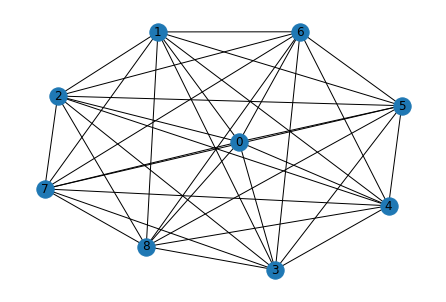

In [115]:
G = nx.complete_graph(9)
nx.draw(G, with_labels = True)

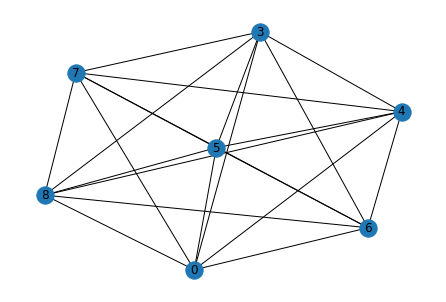

In [116]:
G.remove_nodes_from([1, 2])
nx.draw(G, with_labels = True)

In [117]:
G.edges()

EdgeView([(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)])

In [121]:
from backend.service import TopHeroService
import pandas as pd

edges = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/edges.csv')
hero_service = TopHeroService.create_from(data=edges, preprocess=True)

hero_service.top_n(10)

['SPIDER-MAN/PETER PARKER',
 'CAPTAIN AMERICA',
 'IRON MAN/TONY STARK',
 'THING/BENJAMIN J. GR',
 'THOR/DR. DONALD BLAK',
 'HUMAN TORCH/JOHNNY S',
 'MR. FANTASTIC/REED R',
 'HULK/DR. ROBERT BRUC',
 'WOLVERINE/LOGAN',
 'INVISIBLE WOMAN/SUE']